In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

2023-06-23 19:43:22.748490: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 19:43:24.223777: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

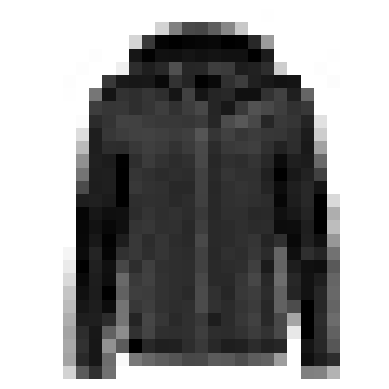

In [4]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.callbacks import History
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

In [10]:
history_conv_2 = History()
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(10,activation="softmax"))

model.summary()

early_stopping = EarlyStopping(patience=30,monitor="val_loss")
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["sparse_categorical_accuracy"])
model.fit(X_train, y_train, epochs=40, batch_size=35, validation_data=(X_valid, y_valid) ,callbacks=[early_stopping, history_conv_2])
model.evaluate(X_test,y_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 1600)             

2023-06-23 19:49:11.820449: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_7/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1572/1572 [==============================] - 10s 6ms/step - loss: 0.4589 - sparse_categorical_accuracy: 0.8324 - val_loss: 0.3292 - val_sparse_categorical_accuracy: 0.8848
Epoch 2/40
1572/1572 [==============================] - 9s 6ms/step - loss: 0.3224 - sparse_categorical_accuracy: 0.8825 - val_loss: 0.2777 - val_sparse_categorical_accuracy: 0.8986
Epoch 3/40
1572/1572 [==============================] - 9s 6ms/step - loss: 0.2787 - sparse_categorical_accuracy: 0.8951 - val_loss: 0.2689 - val_sparse_categorical_accuracy: 0.9024
Epoch 4/40
1572/1572 [==============================] - 9s 6ms/step - loss: 0.2492 - sparse_categorical_accuracy: 0.9080 - val_loss: 0.2626 - val_sparse_categorical_accuracy: 0.9034
Epoch 5/40
1572/1572 [==============================] - 9s 6ms/step - loss: 0.2228 - sparse_categorical_accuracy: 0.9169 - val_loss: 0.2614 - val_sparse_categorical_accuracy: 0.9056
Epoch 6/40
1572/1572 [==============================] - 9s 6ms/step - loss: 0.2016 - sparse_categori

[0.5068017244338989, 0.9071000218391418]